# National School Data Analysis
###### Group B: Steven and Joshua


### Introduction
The level of education has been one of the most essential factor in the development of a country. This report therefore focus on analyzing the state of Indonesian's education system in each province within 5-10 years period and discovering the element for a school to be success. The objective of these findings is going to be valuable for schools and other education department to grow and further turns Indonesia into an advance country.

The dataset used to explore was accessed through the Indonesian ministry of education and culture website, which can be access through the following link:

1. **Direktorat Jenderal Pendidikan Anak Usia Dini, Pendidikan Dasar dan Pendidikan Menengah Kementerian Pendidikan dan Kebudayaan**: [https://dapo.dikdasmen.kemdikbud.go.id/sp](https://dapo.dikdasmen.kemdikbud.go.id/sp)

2. **Pusat Data dan Teknologi Informasi**: [http://statistik.data.kemdikbud.go.id/](http://statistik.data.kemdikbud.go.id/)

3. **Badan Pusat Statistik**: [https://www.bps.go.id/](https://www.bps.go.id/)

4. **UN Kemendikbud**: [https://puspendik.kemdikbud.go.id/hasil-un/](https://puspendik.kemdikbud.go.id/hasil-un/)


The main questions this paper aims to answer are:
1. What is the state of Indonesian education within the past 5-10 years nationally.

2. How large is the discrepancy/inequality in Indonesian education.

3. What is the parameters that contribute the most to a school success. 

In [1]:
#importing library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math

## 1. What is the state of Indonesian education whithin the past 5-10 years nationally

### 1.1. Number of School

First, we simply want to analyze the growth of the number of school in Indonesia in general. There are 9 datasets that are downloaded from **Direktorat Jenderal Pendidikan Anak Usia Dini, Pendidikan Dasar dan Pendidikan Menengah Kementerian Pendidikan dan Kebudayaan** website. Each of the dataset contain the number of school in each teaching semester, thus, the 9 datasets represent from the Semester 2015/2016 Genap until Semester 2019/2020 Genap. The dataset are grouped by the location(provice) and level(jenjang SD, SMP, SMA, SMK, SLB), however, to answer the first question we have our focus on the total number of school growth in Indonesia.

In [2]:
#Reading all the dataset and append it on df array
df = []
for i in range(1,10):
    names = "Desktop/dataset/data_sekolah/df" + str(i) + ".csv"
    df.append(pd.read_csv(names, sep=";", header=[0,1], index_col=0, skiprows=1))
    arrays = [['Wilayah', 'Total', 'Total', 'Total', 'SD', 'SD', 'SD', 'SMP', 'SMP', 'SMP', 'SMA', 'SMA', 'SMA', 'SMK', 'SMK', 'SMK', 'SLB', 'SLB', 'SLB'], ['Wilayah', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S']]
    df[i-1].columns = pd.MultiIndex.from_arrays(arrays)

In [3]:
#Slice the total number of school from all element of df array
Tot_Sekolah = []
ind = []
tahun = 2015
sem = ["Genap", "Ganjil"]

for i in range(8, -1, -1):
    Tot_Sekolah.append(df[i]["Total"]["Jml"].loc["Total"])
    semester = "Semester " + str(tahun) + "/" + str(tahun+1) + " " + sem[i%2]
    ind.append(semester)
    if sem[i%2] == sem[0]:
        tahun += 1

numSchool = pd.DataFrame(data=Tot_Sekolah, index=ind, columns = ["Jumlah Sekolah"])*1000

In [4]:
#Applying Linear Regression
Y = numSchool.reset_index().iloc[:,1].values.reshape(-1, 1)
X = np.array(list(range(1,len(numSchool)+1))).reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

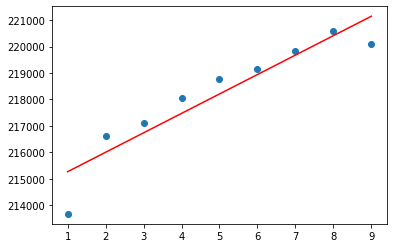

In [5]:
#Plotting Linear Regression
plt.scatter(X,Y)
plt.plot(X, Y_pred, color = 'red')

plt.show()

In [6]:
#Print results
print('coefficient of determination:', linear_regressor.score(X,Y))
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)

coefficient of determination: 0.8683782753112133
intercept: [214536.91666667]
slope: [[734.01666667]]


**Analysis**

To determine whether the number of school in Indonesia increases/decreases with its rate, we plot a linear regression model. We first check its *coefficient of determination ($R^{2}$)*, an index that indicate how well a statistical model fits the data. For this data the vakue of $R^{2}$ is approaching to 1 which mean the data is linear fit and we can use linear regression. After plotting the linear regression, we achieve a fitted model that can be written as Y = 214536.9 + 734 X.


**RESULT**

The number of school in Indonesia throughout 9 semester increases with and increase of about 734 school each semester

### 1.2. Student vs Teacher Ratio

Next, we want to analyze the growth of student and teacher ratio throughout the year. From the same website as above, we downloaded 18 dataset, which 9 of them contain the total number of student in each semester, and the other 9 of them contain he total number of teacher in each semester. The 9 datasets also represent from the Semester 2015/2016 Genap until Semester 2019/2020 Genap.

In [7]:
#Reading all the dataset (murid & guru) and append it to df array
df_m = []
df_g = []
for i in range(1,10):
    names_m = "Desktop/dataset/data_peserta_didik/df" + str(i) + ".csv"
    df_m.append(pd.read_csv(names_m, sep=";", header=[0,1], index_col=0, skiprows=1))
    
    names_g = "Desktop/dataset/data_guru/df" + str(i) + ".csv"
    df_g.append(pd.read_csv(names_g, sep=";", header=[0,1], index_col=0, skiprows=1))
    
    arrays = [['Wilayah', 'Total', 'Total', 'Total', 'SD', 'SD', 'SD', 'SMP', 'SMP', 'SMP', 'SMA', 'SMA', 'SMA', 'SMK', 'SMK', 'SMK', 'SLB', 'SLB', 'SLB'], ['Wilayah', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S']]
    df_m[i-1].columns = pd.MultiIndex.from_arrays(arrays)
    df_g[i-1].columns = pd.MultiIndex.from_arrays(arrays)

In [14]:
#Slice the total number of student and teacher from all element of df array
Tot_m = []
Tot_g = []
ind = []
tahun = 2015
sem = ["Genap", "Ganjil"]


for i in range(8, -1, -1):
    Tot_m.append(df_m[i]["Total"]["Jml"].loc["Total"])
    Tot_g.append(df_g[i]["Total"]["Jml"].loc["Total"])
    
    semester = "Semester " + str(tahun) + "/" + str(tahun+1) + " " + sem[i%2]
    ind.append(semester)
    if sem[i%2] == sem[0]:
        tahun += 1
        
ratio_mg = {"Jml Murid":Tot_m, "Jml Guru":Tot_g}
ratio_mg = pd.DataFrame(ratio_mg, index=ind) 


#Type conversion from string to int
repl_list = {',':'.', r'\.': '', r' ': ''}
ratio_mg["Jml Murid"].replace(repl_list, regex=True, inplace=True)
ratio_mg["Jml Guru"].replace(repl_list, regex=True, inplace=True)

ratio_mg["Jml Murid"] = ratio_mg["Jml Murid"].astype(int)
ratio_mg["Jml Guru"] = ratio_mg["Jml Guru"].astype(int)
#ratio_mg.dtypes

ratio_mg["Jml Murid per Guru"] = ratio_mg["Jml Murid"]/ratio_mg["Jml Guru"]

In [15]:
#Applying Linear Regression
Y = ratio_mg.reset_index().iloc[:,3].values.reshape(-1, 1)
X = np.array(list(range(1,len(ratio_mg)+1))).reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

In [16]:
#plt.subplot(2,1,1)
#plt.plot(range(1,10), ratio_mg["Jml Murid"])
#plt.subplot(2,1,2)
#plt.plot(range(1,10), ratio_mg["Jml Guru"])
#plt.tight_layout()
#plt.show()

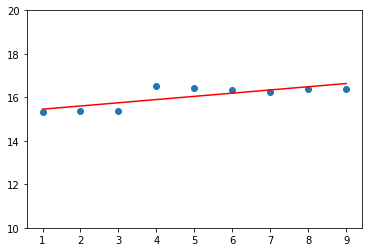

In [17]:
#Plotting Linear Regression
plt.scatter(X,Y)
plt.plot(X, Y_pred, color = 'red')
plt.ylim(10,20)
plt.show()

In [18]:
#Print results
print('coefficient of determination:', linear_regressor.score(X,Y))
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)

coefficient of determination: 0.6154252328777234
intercept: [15.30739678]
slope: [[0.14752335]]


**Analysis**

To determine trend of teacher vs student ratio, we create a new column called `Jml Murid per Guru` which its value indicate the average number of student a teacher need to teach. Then we plot a linear regression model again. After plotting the linear regression, we achieve a fitted model that can be written as Y = 15.3 + 0.15 X.


**RESULT**

The ratio of student vs teacher nimber in Indonesia throughout 9 semester increases by a bit or even we can say it almost remain constant. There number of student per teacher only increases from 15.3 student to 16.4 student per teacher.

### 1.3. School Participation Rate (APM)

As we can see from the previous analysis that the number of school in Indonesia increases throughout 9 semester. However, we presume that during that period, not only the number of school increases, but also there may be an increase in the number of children that reach the age to go to school. So, we are interested to analyze the percentage of children who have access to the formal school education.

Angka Partisipasi Murni (APM) is an index indicating the percentage of student with a respective age that have an access to education compare to the total population of the same age. In this part we use APM value downloaded from the **Badan Pusat Statistik** website. The dataset consist of the APM percentage in 3 jenjang (SD, SMP, SMA) of each province from the year of 2011-2019

In [26]:
#Read and clean the apm data
df_apm = pd.read_csv("Desktop/dataset/apm.csv", header=[1,2], sep=";")
year = range(2011, 2020)
level = ["SD", "SMP", "SMA"]
col_name = [str(i) + "-" + j for i in year for j in level]
df_apm.columns = ["Provinsi"] + col_name
df_apm = df_apm.set_index("Provinsi")
df_apm = df_apm.replace("-", 0)
df_apm = df_apm.astype(float)

In [27]:
#Separate the df_apm into per jenjang
sd_col = [i for i in range(len(df_apm.columns)) if df_apm.columns[i].find("SD")!=-1]
smp_col = [i for i in range(len(df_apm.columns)) if df_apm.columns[i].find("SMP")!=-1]
sma_col = [i for i in range(len(df_apm.columns)) if df_apm.columns[i].find("SMA")!=-1]

df_apm_sd = df_apm.iloc[:, sd_col]
df_apm_smp = df_apm.iloc[:, smp_col]
df_apm_sma = df_apm.iloc[:, sma_col]

df_apm_sd.columns = year
df_apm_smp.columns = year
df_apm_sma.columns = year

In [28]:
#Applying Linear Regression
Y_sd = df_apm_sd.loc["INDONESIA"].values.reshape(-1, 1)
X = np.array(year).reshape(-1,1)
linear_regressor_sd = LinearRegression()
linear_regressor_sd.fit(X, Y_sd)
Y_sd_pred = linear_regressor_sd.predict(X)

Y_smp = df_apm_smp.loc["INDONESIA"].values.reshape(-1, 1)
X = np.array(year).reshape(-1,1)
linear_regressor_smp = LinearRegression()
linear_regressor_smp.fit(X, Y_smp)
Y_smp_pred = linear_regressor_smp.predict(X)

Y_sma = df_apm_sma.loc["INDONESIA"].values.reshape(-1, 1)
X = np.array(year).reshape(-1,1)
linear_regressor_sma = LinearRegression()
linear_regressor_sma.fit(X, Y_sma)
Y_sma_pred = linear_regressor_sma.predict(X)


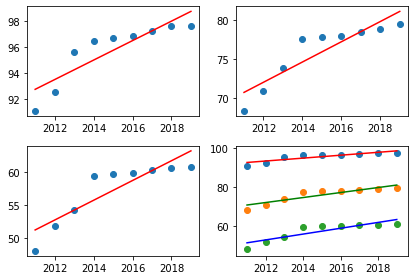

In [29]:
#Plotting

plt.subplot(2,2,1)
plt.scatter(X,Y_sd)
plt.plot(X, Y_sd_pred, color = 'red')

plt.subplot(2,2,2)
plt.scatter(X,Y_smp)
plt.plot(X, Y_smp_pred, color = 'red')

plt.subplot(2,2,3)
plt.scatter(X,Y_sma)
plt.plot(X, Y_sma_pred, color = 'red')

plt.subplot(2,2,4)
plt.scatter(X,Y_sd)
plt.scatter(X,Y_smp)
plt.scatter(X,Y_sma)
plt.plot(X, Y_sd_pred, color = 'red')
plt.plot(X, Y_smp_pred, color = 'green')
plt.plot(X, Y_sma_pred, color = 'blue')


plt.tight_layout()
plt.show()

In [30]:
#Print results
print('SD:')
print('coefficient of determination:', linear_regressor_sd.score(X,Y_sd))
print('intercept:', linear_regressor_sd.intercept_)
print('slope:', linear_regressor_sd.coef_)
print()
print('SMP:')
print('coefficient of determination:', linear_regressor_smp.score(X,Y_smp))
print('intercept:', linear_regressor_smp.intercept_)
print('slope:', linear_regressor_smp.coef_)
print()
print('SMA:')
print('coefficient of determination:', linear_regressor_sma.score(X,Y_sma))
print('intercept:', linear_regressor_sma.intercept_)
print('slope:', linear_regressor_sma.coef_)
print()

SD:
coefficient of determination: 0.770208646482909
intercept: [-1414.51138889]
slope: [[0.7495]]

SMP:
coefficient of determination: 0.8085889628314542
intercept: [-2521.76972222]
slope: [[1.28916667]]

SMA:
coefficient of determination: 0.7800767973770719
intercept: [-2975.00694444]
slope: [[1.50483333]]



**Analysis**

Again we use linear regression model to plot the trend of APM percentage value of SD, SMP and SMA school. The plotted lines are:
- Y = -1414.5 + 0.75X for SD
- Y = -2521.8 + 1.3X for SMP
- Y = -2975.0 + 1.5X for SMA

 
**RESULT**

The result shown that all 3 jenjang experience an increase in their APM percentage value. The increasing rate order from the biggest to the lowest are SMA, SMP and SD respectively.

### 1.4. Indonesian Citizen Education Level

Lastly, after analyzing the growth of number of school, number of student per teacher and percentage of student who have access to education, we are interested in the number of educated Indonesian citizen and their education level. The education level are determine from the proportion of illiterate citizen and citizen with information and computer technology skill the according to the age category which the datas are downloaded for **Badan Pusat Statistik** website. 

#### 1.4.1. Illiterate (Buta Huruf) Citizen

In [31]:
#Read buta huruf percentage data
df_bh = pd.read_csv("Desktop/dataset/buta_huruf.csv", header=[1,2], sep=";")
year = range(2011, 2020)
level = ["< 15", "15-44", ">= 45"]
col_name = [str(i) + " " + j for i in year for j in level]
df_bh.columns = ["Provinsi"] + col_name
df_bh = df_bh.set_index("Provinsi")
df_bh = df_bh.replace("-", 0)
df_bh = df_bh.astype(float)

In [32]:
#Separate into several column
col_1 = [i for i in range(len(df_apm.columns)) if df_bh.columns[i].find("< 15")!=-1]
col_2 = [i for i in range(len(df_apm.columns)) if df_bh.columns[i].find("15-44")!=-1]

df_bh_1 = df_bh.iloc[:, col_1]
df_bh_2 = df_bh.iloc[:, col_2]

df_bh_1.columns = year
df_bh_2.columns = year

In [33]:
#Applying Linear Regression
Y_1 = df_bh_1.loc["INDONESIA"].values.reshape(-1, 1)
X = np.array(year).reshape(-1,1)
linear_regressor_1 = LinearRegression()
linear_regressor_1.fit(X, Y_1)
Y_1_pred = linear_regressor_1.predict(X)

linear_regressor_1p = LinearRegression()
linear_regressor_1p.fit(X, 1/Y_1)
Y_1p_pred = linear_regressor_1p.predict(X)


Y_2 = df_bh_2.loc["INDONESIA"].values.reshape(-1, 1)
X = np.array(year).reshape(-1,1)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X, Y_2)
Y_2_pred = linear_regressor_2.predict(X)

linear_regressor_2p = LinearRegression()
linear_regressor_2p.fit(X, 1/Y_2)
Y_2p_pred = linear_regressor_2p.predict(X)

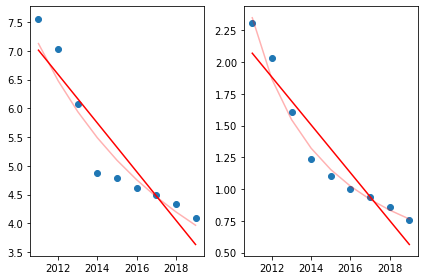

In [34]:
#Plotting
plt.subplot(1,2,1)
plt.scatter(X,Y_1)
plt.plot(X, Y_1_pred, color = 'red')
plt.plot(X, 1/Y_1p_pred, color = 'red', alpha = 0.3)

plt.subplot(1,2,2)
plt.scatter(X,Y_2)
plt.plot(X, Y_2_pred, color = 'red')
plt.plot(X, 1/Y_2p_pred, color = 'red', alpha = 0.3)

plt.tight_layout()
plt.show()

In [36]:
#Print results
print('< 15:')
print('coefficient of determination:', linear_regressor_1.score(X,Y_1))
print('intercept:', linear_regressor_1.intercept_)
print('slope:', linear_regressor_1.coef_)
print()
print('15-44:')
print('coefficient of determination:', linear_regressor_2.score(X,Y_2))
print('intercept:', linear_regressor_2.intercept_)
print('slope:', linear_regressor_2.coef_)

< 15:
coefficient of determination: 0.8476335902738427
intercept: [855.98694444]
slope: [[-0.42216667]]

15-44:
coefficient of determination: 0.8870153096729329
intercept: [380.4725]
slope: [[-0.18816667]]


**Analysis**

Again we use linear regression model to plot the trend of the percentage of illiterate citizen with the age of < 15 and 15-44 years old group. As, our objective is to analyze the school data for the past 10 years, citizen with age group > 44 are not significant. Both of the group show a downtrend of:
- Y = 855 - 0.42X for < 15
- Y = 380 - 0.19X for 15-44
However, a 1/x polynomial line looks more suitable to represent both of the scatter plot compare to the linear line. So, we try to find a fitted model of y = 1/x function
 
**RESULT**

The result shown that the percentage of both < 15 and 15-44 years old group illiterate citizen reduced throughout the the 10 years.

#### 1.4.2. Knowledge on Technology

In [489]:
df_tik = pd.read_csv("Desktop/dataset/keterampilan_tik.csv", sep=";").dropna()
df_tik.columns = ["Provinsi", "2015", "2016", "2017", "2018", "2019"]
#repl_list = {',':'.', r'\.': '', r' ': ''}
df_tik["Provinsi"].str.lstrip()
df_tik = df_tik.set_index("Provinsi")

In [486]:
#Applying Linear Regression
Y = df_tik.loc["INDONESIA"].values.reshape(-1, 1)
X = np.array(list(range(2015,2020))).reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

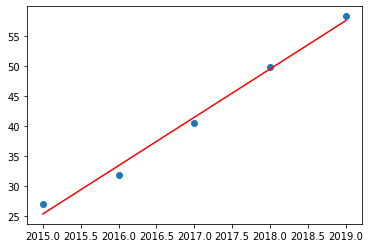

In [487]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'red')
plt.show()

In [488]:
#Print results
print('coefficient of determination:', linear_regressor.score(X,Y))
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)

coefficient of determination: 0.9896186990743315
intercept: [-16146.982]
slope: [[8.026]]


**Analysis**

We once again use linear regression model to plot the trend of the percentage of citizen with information and computer technology skill throughout the year, and the data actually almost equivalent to the Y = -16146 +8.0X line.
 
**RESULT**

The result shown that the percentage of citizen with information and computer technology skill increases by about 8% each year.

## 2. How large is the discrepancy/inequality in Indonesian education

### 2.1. Number of School per Area

From the latest data of number of school in Indonesia `(df[0])`, we want to compare the different/discrepancy number of school per province while using its area as a comparison

In [426]:
#Read the luas wilayah data and take the latest year
df_lw = pd.read_csv("Desktop\dataset\data_luas_wilayah\luas_wilayah.csv", sep=";", header=[0,1], index_col=0, skiprows=3)
df_lw = df_lw['2016'].dropna()
repl_list = {',':'.', r'\.': '', r' ': ''}
df_lw["Luas 1"].replace(repl_list, regex=True, inplace=True)
df_lw["Luas 1"] = df_lw["Luas 1"].astype(int)
df_lw["Luas 1"] /= 100

In [427]:
# Make a copy of df[0] and make the index the same as luas wilayah
df_copy = df[0].copy()
df_copy["Wilayah"] = df_copy["Wilayah"]["Wilayah"].map(lambda x: x.lstrip('Prov.').lstrip(' '))
repl_list = {r'\.': '',}
df_copy["Wilayah"] = df_copy["Wilayah"]["Wilayah"].replace(repl_list, regex=True)

df_copy = df_copy.set_index(df_copy["Wilayah"]["Wilayah"])
df_copy = df_copy._drop_axis(["Wilayah"], axis=1, level=1)

# Make adjustment of Indonesian . and ,
df_copy["Total"] *= 1000
df_copy.loc["Kalimantan Utara"] /= 1000

In [428]:
#Combine the num of school data and luas wilayah data
df_lw = pd.concat([df_copy.Total, df_lw], axis=1, join='outer').dropna()
#df_lw.reset_index()
df_lw["Luas per Jml"] = df_lw["Luas 1"] / df_lw["Jml"]

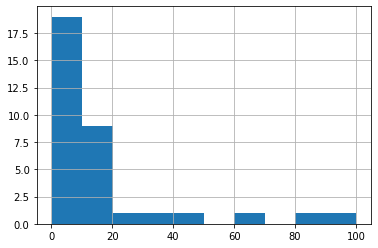

In [429]:
# Plot Histogram
data = df_lw["Luas per Jml"]
w = 10
n = math.ceil((data.max() - data.min())/w)
ax = plt.hist(data, bins = n)
plt.grid()
plt.show()
#df_lw["Luas per Jml"].hist()       

In [430]:
#Searching for Upper bound Outlier
sorted(df_lw["Luas per Jml"])
q1, q3= np.percentile(df_lw["Luas per Jml"],[25,75])
iqr = q3 - q1
upper_bound = q3 +(1.5 * iqr)

df_lw[df_lw["Luas per Jml"] > upper_bound].sort_values(["Luas per Jml"])
#S col need to be fix

,Jml,N,S,Luas 1,Luas per Jml
Kalimantan Tengah,3868.0,3420.0,448000.0,153564.50,39.701267
Kalimantan Timur,3030.0,2329.0,701000.0,129066.64,42.596251
Papua Barat,1567.0,1010.0,557000.0,99671.63,63.606656
Papua,3687.0,2358.0,1329.0,319036.05,86.529984
Kalimantan Utara,754.0,649.0,105.0,75467.70,100.089788


In [431]:
df_lw.sort_values(["Luas per Jml"]).head()

,Jml,N,S,Luas 1,Luas per Jml
DKI Jakarta,4598.0,1945.0,2653.0,664.01,0.144413
DI Yogyakarta,2748.0,1770.0,978000.0,3133.15,1.140156
Jawa Barat,30120.0,20360.0,9760.0,35377.76,1.174560
Banten,7557.0,4759.0,2798.0,9662.92,1.278671
Jawa Tengah,24925.0,20124.0,4801.0,32800.69,1.315976


The `Luas per Jml` column indicate the average area of a school cover in a province which also means a province with a lower value has a better access to education. From the histogram, most of the province in Indonesia averagely have a school within less than 20 km square. 

The provinces with a better school access are generally located in the west and central part of Java. , the capital of Indonesia, DKI Jakarta has an extremely low value (10 times lower than the runner up) that means there is a school in every 0.1 km square in Jakarta.

However, there are some school with `Luas per Jml` that are significantly higher than the rest. Those school that fall into the upper bound outlier are located in Kalimantan and Papua.

### 2.2. Student vs Teacher Ratio

In [432]:
# Do a slicing on data murid and data guru
df_murid = df_m[0]["Total"].set_index(df_m[0]["Wilayah"]["Wilayah"].map(lambda x: x.lstrip('Prov.').lstrip(' ')))
df_murid.columns = ["Jml Murid", "Murid N", "Murid S"]

df_guru = df_g[0]["Total"].set_index(df_g[0]["Wilayah"]["Wilayah"].map(lambda x: x.lstrip('Prov.').lstrip(' ')))
df_guru.columns = ["Jml Guru", "Guru N", "Guru S"]

In [433]:
#Combine both data and do data type conversion
df_mgc = pd.concat([df_murid, df_guru], axis=1, join='outer').dropna()

repl_list = {r'\.': '',}
df_mgc = df_mgc.replace(repl_list, regex=True)
df_mgc["Guru N"] *= 1000
df_mgc = df_mgc.astype(int)

df_mgc["Jml Murid"] = df_mgc["Murid N"] + df_mgc["Murid S"]
df_mgc["Jml Guru"] = df_mgc["Guru N"] + df_mgc["Guru S"]

In [434]:
#Create Murid/Guru col
df_mgc["Murid per Guru"] = df_mgc["Jml Murid"] / df_mgc["Jml Guru"]
df_mgc.sort_values("Murid per Guru").head()

,Jml Murid,Murid N,Murid S,Jml Guru,Guru N,Guru S,Murid per Guru
Luar Negeri,19936,10151,9785,373462,373000,462,0.053382
Sulawesi Tengah,304681,28644,276037,42820,14227,28593,7.115390
Sumatera Barat,576340,54894,521446,77453,17548,59905,7.441158
Riau,696359,67045,629314,84732,22785,61947,8.218371
Kalimantan Timur,385507,37422,348085,43231,15155,28076,8.917374


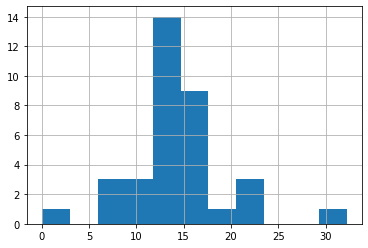

In [435]:
# Plot Histogram
data = df_mgc["Murid per Guru"].drop("Total")
w = 3
n = math.ceil((data.max() - data.min())/w)
ax = plt.hist(data, bins = n)
plt.grid()
plt.show()

In [436]:
df_mgc.loc["Total"]["Murid per Guru"]

16.40028954953326

Result:
- The average ratio of student every one teacher is 16.4
- Aside from the *luar negeri*, Sulawesi Tengah, Sumatera Barat, Riau, and one of the province that has the less number of school per km squares, Kalimantan Timur, has the most percentage of teacher compare to student.
- While Papua and Sulawesi Tenggara has a high value of `Murid per Guru`, the province with more school such as Jawa Tengah, DKI Jakarta, Banten, Jawa Barat also has a large number of student compare to the teacher

### 2.3. School Participation Rate (APM)

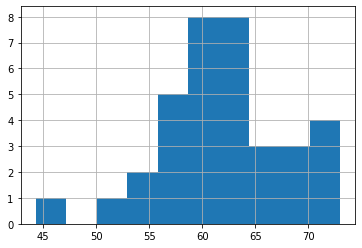

In [507]:
df_apm_sma[2019].hist()

In [513]:
# Finding outlier
iqr = df_apm_sma[2019].describe()[6] - df_apm_sma[2019].describe()[4]
lower_bound = df_apm_sma[2019].describe()[4] -(1.5 * iqr) 
upper_bound = df_apm_sma[2019].describe()[6] +(1.5 * iqr)
df_apm_sma[df_apm_sma[2019] < lower_bound]

,2011,2012,2013,2014,2015,2016,2017,2018,2019
Provinsi,,,,,,,,,
PAPUA,30.82,29.16,36.73,43.11,43.22,43.27,43.48,44.31,44.32


### 2.4. Education Level

#### 2.4.1. Illiterate Citizen Percentage

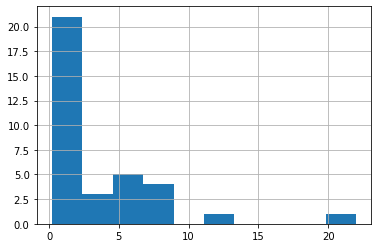

In [562]:
#Illiterate <15 year
df_bh_1[2019].hist()

In [566]:
df_bh_1.sort_values(2019, ascending=False)

,2011,2012,2013,2014,2015,2016,2017,2018,2019
Provinsi,,,,,,,,,
PAPUA,35.47,34.70,32.69,29.22,29.17,28.98,26.11,23.21,22.00
NUSA TENGGARA BARAT,17.35,17.08,15.33,13.04,13.03,12.94,12.86,12.58,12.41
JAWA TIMUR,12.20,11.18,9.86,8.64,8.53,8.41,8.18,8.15,7.68
SULAWESI SELATAN,12.34,11.50,9.84,8.74,8.71,8.48,8.35,8.19,7.55
KALIMANTAN BARAT,10.36,9.28,8.66,7.70,7.68,7.61,7.52,7.42,6.79
NUSA TENGGARA TIMUR,12.15,11.23,9.64,8.82,8.55,8.48,8.32,8.10,6.76
JAWA TENGAH,10.25,10.07,8.73,7.02,6.88,6.70,6.61,6.55,6.46
SULAWESI BARAT,12.25,11.07,9.21,7.73,7.36,7.25,7.21,7.15,6.41
BALI,11.31,10.08,9.16,7.44,7.23,7.18,7.10,7.02,5.47


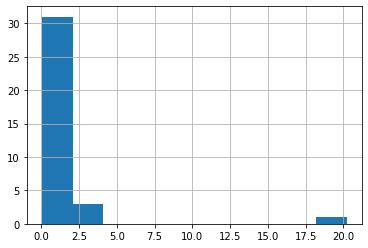

In [563]:
df_bh_2[2019].hist()

In [565]:
df_bh_2.sort_values(2019, ascending=False)

,2011,2012,2013,2014,2015,2016,2017,2018,2019
Provinsi,,,,,,,,,
PAPUA,34.55,33.40,31.44,28.50,28.47,28.21,24.66,21.20,20.21
NUSA TENGGARA TIMUR,5.67,5.40,4.18,3.48,3.10,3.06,3.08,3.03,2.51
NUSA TENGGARA BARAT,5.83,5.73,4.86,3.54,3.31,3.26,3.20,2.72,2.46
SULAWESI BARAT,6.45,5.86,4.73,3.93,3.33,3.06,3.16,3.29,2.31
SULAWESI SELATAN,4.83,4.17,3.20,2.58,2.22,2.07,2.03,2.02,1.72
PAPUA BARAT,5.37,4.53,2.93,2.27,2.09,1.97,1.94,1.83,1.53
KALIMANTAN BARAT,4.23,3.11,2.64,2.06,2.00,1.88,1.76,1.63,1.46
SULAWESI TENGGARA,3.15,2.84,2.05,1.62,1.37,1.19,1.14,1.08,0.94
JAWA TIMUR,2.59,2.24,1.84,1.43,1.24,1.09,1.01,1.04,0.93


#### 2.4.2. Knowledge on Technology

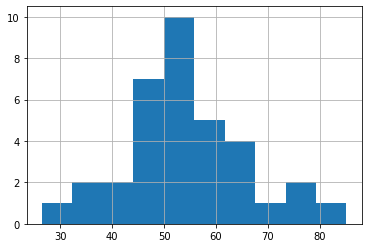

In [542]:
df_tik["2019"].hist()

In [546]:
# Finding Outlier
iqr = df_tik["2019"].describe()[6] - df_tik["2019"].describe()[4]
lower_bound = df_tik["2019"].describe()[4] -(1.5 * iqr) 
upper_bound = df_tik["2019"].describe()[6] +(1.5 * iqr)
df_tik[df_tik["2019"] < lower_bound]
df_tik[df_tik["2019"] > upper_bound]

,2015,2016,2017,2018,2019
Provinsi,,,,,
KEP. RIAU,43.42,50.1,58.87,65.60,77.18
DKI JAKARTA,53.25,58.4,71.39,77.14,85.17


## 3. What is the parameters that contribute the most to a school success (SMA)

#### Success School Measurement

In this analysis, we measure a school suceedity by its Ujian National Score. We believe that if a province achieve a higher average UN score, the school in that province are more successful. Therefore we extract the average UN score in each province from (https://puspendik.kemdikbud.go.id/hasil-un/)[https://puspendik.kemdikbud.go.id/hasil-un/].

In [437]:
# Read and clean un score per province data
df_un = pd.read_csv("Desktop/dataset/data_un/nilai_un_sma.csv",sep=";", header = [0,1], index_col=1, skiprows=3).iloc[:,1:-1]
df_un.columns = ["Provinsi", "Jumlah Satuan Pendidikan", "Jumlah Peserta", "B Indonesia", "B Inggris", "Matematika", "Fisika", "Kimia", "Biologi", "Rerata Nilai"]
#repl_list = {r'\,': '.'}
#df_un["Rerata Nilai"].replace(repl_list, regex=True, inplace=True)
#df_un["Rerata Nilai"] = df_un["Rerata Nilai"].astype(float)

df_un.at[28, 'Provinsi'] = "KEPULAUAN BANGKA BELITUNG"
df_un = df_un.set_index("Provinsi") 

### 3.1. UN Score vs Ijazah Tertinggi Guru

In [438]:
#IJAZAH TERTINGGI GURU
df_itg = pd.read_csv("Desktop/dataset/data_resource/ijazah_tertinggi_guru.csv").iloc[2:,[0,5,6,7]].dropna(how="all")
df_itg.columns = ["Provinsi", "< SMA", ">= SMA", "Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_itg["Provinsi"].replace(repl_list, regex=True, inplace=True)
df_itg["Provinsi"] = df_itg["Provinsi"].str.lstrip().str.upper()
df_itg.replace({r'\,':''}, regex=True, inplace=True)
df_itg[["< SMA", ">= SMA", "Total"]]=df_itg[["< SMA", ">= SMA", "Total"]].astype(int)
df_itg=df_itg.reset_index().iloc[:,1:]
df_itg.set_index("Provinsi", inplace=True)

In [439]:
#Percentage of teacher with higher education (>=SMA)
df_itg["Percentase"] = df_itg[">= SMA"] / df_itg["Total"]
df_itg.head()

,< SMA,>= SMA,Total,Percentase
Provinsi,,,,
DKI JAKARTA,306,1883,2189,0.860210
JAWA BARAT,1192,6724,7916,0.849419
JAWA TENGAH,481,5134,5615,0.914337
DI YOGYAKARTA,127,915,1042,0.878119
JAWA TIMUR,780,5496,6276,0.875717


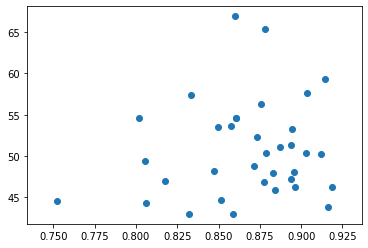

In [440]:
#Combine IJAZAH TERTINGGI GURU and UN SCORE
df_un_itg = pd.concat([df_un["Rerata Nilai"], df_itg["Percentase"]], axis=1, join="inner")
plt.scatter(df_itg["Percentase"], df_un["Rerata Nilai"])

In [441]:
#Find Pearson correlation
df_un_itg.corr(method='pearson')

,Rerata Nilai,Percentase
Rerata Nilai,1.000000,0.102152
Percentase,0.102152,1.000000


#### Result Weak-None Correlation !

### 3.2. UN Score vs Masa Kerja Guru

In [442]:
#MASA KERJA GURU
df_mkg = pd.read_csv("Desktop/dataset/data_resource/masa_kerja_guru.csv").iloc[:,[1,2,4,6,8,10,12,14]].dropna(how='all')
df_mkg.columns = ["Provinsi", "<=4", "5-9", "10-14", "15-19", "20-24", ">=25", "Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_mkg["Provinsi"].replace(repl_list, regex=True, inplace=True)
df_mkg["Provinsi"] = df_mkg["Provinsi"].str.lstrip().str.upper()
df_mkg.replace({r'\,':''}, regex=True, inplace=True)
#df_mkg.iloc[:,1:]=df_mkg.iloc[:,1:].astype(int)
df_mkg.dropna()
df_mkg.set_index("Provinsi", inplace=True)
df_mkg=df_mkg.astype(int)
#df_mkg.dtypes

In [443]:
#Find mean (expectation) of Teachers' teaching experience in each province
year = [2,7,12,17,22,27]
df_mkg["Rerata Pengalaman"] = 0

for i in range(0,len(year)):
    df_mkg["Rerata Pengalaman"] += year[i] * df_mkg[df_mkg.columns[i]]

df_mkg["Rerata Pengalaman"] /= df_mkg["Total"]
df_mkg.sort_values("Rerata Pengalaman").head()

,<=4,5-9,10-14,15-19,20-24,>=25,Total,Rerata Pengalaman
Provinsi,,,,,,,,
DKI JAKARTA,6517,2085,817,650,384,681,8701,8.656246
PAPUA,1988,1184,585,267,110,130,3316,8.972557
MALUKU UTARA,1419,951,500,173,109,97,2527,9.280966
KALIMANTAN BARAT,3291,1947,1195,397,141,259,5464,9.406113
NUSA TENGGARA TIMUR,5683,4666,1835,753,304,336,10008,9.453337


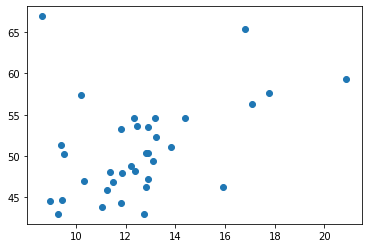

In [444]:
#Combine MASA KERJA GURU and UN SCORE
df_un_mkg = pd.concat([df_un["Rerata Nilai"], df_mkg["Rerata Pengalaman"]], axis=1, join="inner")
plt.scatter(df_mkg["Rerata Pengalaman"], df_un["Rerata Nilai"])

In [445]:
#Find Pearson correlation
df_un_mkg.corr(method='pearson')

,Rerata Nilai,Rerata Pengalaman
Rerata Nilai,1.000000,0.389838
Rerata Pengalaman,0.389838,1.000000


#### Result: Weak Correlation

### 3.3. UN Score vs Resources

In [446]:
#KONDISI LABORATORIUM IPA
df_kli = pd.read_csv("Desktop/dataset/data_resource/kondisi_laboratorium_ipa.csv").iloc[:,[0,3,5,7,9,11,13]].dropna(how='all')
df_kli.columns = ["Provinsi", "Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_kli["Provinsi"].replace(repl_list, regex=True, inplace=True)
df_kli["Provinsi"] = df_kli["Provinsi"].str.lstrip().str.upper()
df_kli.replace({r'\,':''}, regex=True, inplace=True)
df_kli[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]]=df_kli[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]].astype(int)
df_kli.set_index("Provinsi", inplace=True)

#Find the percentage of Good resource
df_kli["Persentase KLI"] = df_kli["Baik"] / df_kli["Jumlah Total"]
df_kli.sort_values("Persentase KLI", ascending=False).head()

,Baik,Rusak Ringan,Rusak Sedang,Rusak Berat,Rusak Total,Jumlah Total,Persentase KLI
Provinsi,,,,,,,
DKI JAKARTA,697,607,10,1,0,1315,0.530038
KEPULAUAN RIAU,109,124,12,6,0,251,0.434263
BALI,135,180,7,9,0,331,0.407855
BANTEN,364,454,44,36,0,898,0.405345
KALIMANTAN SELATAN,132,202,8,6,0,348,0.379310


In [447]:
#KONDISI PERPUSTAKAAN
df_kp = pd.read_csv("Desktop/dataset/data_resource/kondisi_perpustakaan.csv").iloc[:,[0,3,5,7,9,11,13]].dropna(how='all')
df_kp.columns = ["Provinsi", "Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_kp["Provinsi"].replace(repl_list, regex=True, inplace=True)
df_kp["Provinsi"] = df_kp["Provinsi"].str.lstrip().str.upper()
df_kp.replace({r'\,':''}, regex=True, inplace=True)
df_kp[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]]=df_kp[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]].astype(int)
df_kp.set_index("Provinsi", inplace=True)

#Find the percentage of Good resource
df_kp["Persentase KP"] = df_kp["Baik"] / df_kp["Jumlah Total"]
df_kp.sort_values("Persentase KP", ascending=False).head()

,Baik,Rusak Ringan,Rusak Sedang,Rusak Berat,Rusak Total,Jumlah Total,Persentase KP
Provinsi,,,,,,,
DKI JAKARTA,239,244,7,2,0,492,0.485772
KEPULAUAN RIAU,63,70,3,1,0,137,0.459854
KALIMANTAN SELATAN,75,111,2,9,0,197,0.380711
BALI,60,94,3,1,0,158,0.379747
KALIMANTAN TIMUR,73,131,5,5,0,214,0.341121


In [448]:
#KONDISI RUANG KELAS
df_krk = pd.read_csv("Desktop/dataset/data_resource/kondisi_ruang_kelas.csv").iloc[:,[0,3,5,7,9,11,13]].dropna(how='all')
df_krk.columns = ["Provinsi", "Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_krk["Provinsi"].replace(repl_list, regex=True, inplace=True)
df_krk["Provinsi"] = df_krk["Provinsi"].str.lstrip().str.upper()
df_krk.replace({r'\,':''}, regex=True, inplace=True)
df_krk[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]]=df_krk[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]].astype(int)
df_krk.set_index("Provinsi", inplace=True)

#Find the percentage of Good resource
df_krk["Persentase KRK"] = df_krk["Baik"] / df_krk["Jumlah Total"]
df_krk.sort_values("Persentase KRK", ascending=False).head()

,Baik,Rusak Ringan,Rusak Sedang,Rusak Berat,Rusak Total,Jumlah Total,Persentase KRK
Provinsi,,,,,,,
DKI JAKARTA,3286,3116,53,0,0,6455,0.509063
BALI,1080,1673,35,10,0,2798,0.385990
KEPULAUAN RIAU,616,937,69,16,0,1638,0.376068
KEPULAUAN BANGKA BELITUNG,350,540,34,39,0,963,0.363448
KALIMANTAN SELATAN,871,1501,59,15,0,2446,0.356092


In [449]:
#KONDISI USAHA KESEHATAN
df_kuk = pd.read_csv("Desktop/dataset/data_resource/kondisi_usaha_kesehatan.csv").iloc[:,[0,3,5,7,9,11,13]].dropna(how='all')
df_kuk.columns = ["Provinsi", "Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_kuk["Provinsi"].replace(repl_list, regex=True, inplace=True)
df_kuk["Provinsi"] = df_kuk["Provinsi"].str.lstrip().str.upper()
df_kuk.replace({r'\,':''}, regex=True, inplace=True)
df_kuk[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]]=df_kuk[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]].astype(int)
df_kuk.set_index("Provinsi", inplace=True)

#Find the percentage of Good resource
df_kuk["Persentase KUK"] = df_kuk["Baik"] / df_kuk["Jumlah Total"]
df_kuk.sort_values("Persentase KUK", ascending=False).head()

,Baik,Rusak Ringan,Rusak Sedang,Rusak Berat,Rusak Total,Jumlah Total,Persentase KUK
Provinsi,,,,,,,
DKI JAKARTA,220,200,3,0,0,423,0.520095
KEPULAUAN RIAU,34,37,7,0,0,78,0.435897
BALI,51,64,3,2,0,120,0.425000
KALIMANTAN SELATAN,49,70,0,2,0,121,0.404959
BANTEN,116,173,11,8,0,308,0.376623


In [450]:
#KONDISI SUMBER AIR
df_ksa = pd.read_csv("Desktop/dataset/data_resource/kondisi_usaha_kesehatan.csv").iloc[:,[0,3,5,7,9,11,13]].dropna(how='all')
df_ksa.columns = ["Provinsi", "Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_ksa["Provinsi"].replace(repl_list, regex=True, inplace=True)
df_ksa["Provinsi"] = df_ksa["Provinsi"].str.lstrip().str.upper()
df_ksa.replace({r'\,':''}, regex=True, inplace=True)
df_ksa[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]]=df_ksa[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]].astype(int)
df_ksa.set_index("Provinsi", inplace=True)

#Find the percentage of Good resource
df_ksa["Persentase KSA"] = df_ksa["Baik"] / df_ksa["Jumlah Total"]
df_ksa.sort_values("Persentase KSA", ascending=False).head()

,Baik,Rusak Ringan,Rusak Sedang,Rusak Berat,Rusak Total,Jumlah Total,Persentase KSA
Provinsi,,,,,,,
DKI JAKARTA,220,200,3,0,0,423,0.520095
KEPULAUAN RIAU,34,37,7,0,0,78,0.435897
BALI,51,64,3,2,0,120,0.425000
KALIMANTAN SELATAN,49,70,0,2,0,121,0.404959
BANTEN,116,173,11,8,0,308,0.376623


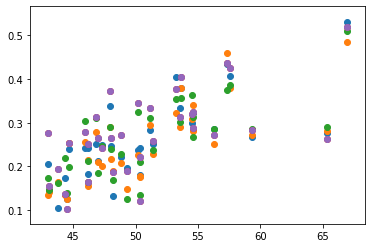

In [451]:
#Combine RESOURCES and UN SCORE
df_un_res = pd.concat([df_un["Rerata Nilai"], df_kli["Persentase KLI"], df_kp["Persentase KP"], df_krk["Persentase KRK"], df_kuk["Persentase KUK"], df_ksa["Persentase KSA"]], axis=1, join="inner")
#df_un_res
plt.scatter(df_un_res["Rerata Nilai"], df_un_res["Persentase KLI"])
plt.scatter(df_un_res["Rerata Nilai"], df_un_res["Persentase KP"])
plt.scatter(df_un_res["Rerata Nilai"], df_un_res["Persentase KRK"])
plt.scatter(df_un_res["Rerata Nilai"], df_un_res["Persentase KUK"])
plt.scatter(df_un_res["Rerata Nilai"], df_un_res["Persentase KSA"])

In [452]:
#Find Pearson correlation
df_un_res.corr(method='pearson')

,Rerata Nilai,Persentase KLI,Persentase KP,Persentase KRK,Persentase KUK,Persentase KSA
Rerata Nilai,1.000000,0.740607,0.751989,0.723639,0.625695,0.625695
Persentase KLI,0.740607,1.000000,0.933758,0.907700,0.922214,0.922214
Persentase KP,0.751989,0.933758,1.000000,0.914517,0.911752,0.911752
Persentase KRK,0.723639,0.907700,0.914517,1.000000,0.914930,0.914930
Persentase KUK,0.625695,0.922214,0.911752,0.914930,1.000000,1.000000
Persentase KSA,0.625695,0.922214,0.911752,0.914930,1.000000,1.000000


### UN Score vs Technology

In [453]:
df_tik = df_tik.reset_index()
df_tik["Provinsi"].replace({r'KEP.':'KEPULAUAN'}, regex=True, inplace=True)
df_tik = df_tik.set_index("Provinsi")

In [456]:
df_tik["2019"]
df_un_tec = pd.concat([df_un["Rerata Nilai"], df_tik["2019"]], axis=1, join="inner")
df_un_tec

,Rerata Nilai,2019
Provinsi,,
DKI JAKARTA,66.90,85.17
JAWA BARAT,53.54,65.37
JAWA TENGAH,59.32,58.75
DI YOGYAKARTA,65.35,75.04
JAWA TIMUR,56.28,57.23
ACEH,43.03,46.77
SUMATERA UTARA,47.93,51.78
SUMATERA BARAT,54.61,52.85
RIAU,51.15,55.37


In [457]:
df_un_tec.corr(method='pearson')

,Rerata Nilai,2019
Rerata Nilai,1.000000,0.828873
2019,0.828873,1.000000
